In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from IPython.display import display, Math

from lib.qc_extensions import get_ibm_backend
from lib.logic import *

In [37]:
cnf = CNF([
    [V(0)],
    [V(0, inv=True)]
])

display(Math(cnf.to_latex()))

display(Math(cnf_to_cxf(cnf).to_latex()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

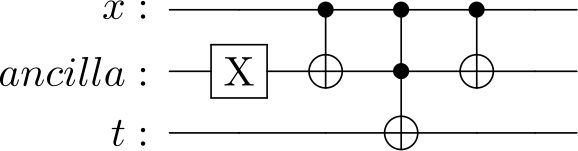

In [38]:
class Oracle(QuantumCircuit):
    def __init__(self):
        x = QuantumRegister(1, name="x")
        ancilla = QuantumRegister(1, name="ancilla")
        target = QuantumRegister(1, name="t")

        super().__init__(x, ancilla, target, name="Oracle")

        self.x(ancilla)
        self.cx(x, ancilla)
        self.ccx(x, ancilla, target)
        self.cx(x, ancilla)
Oracle().visualize()

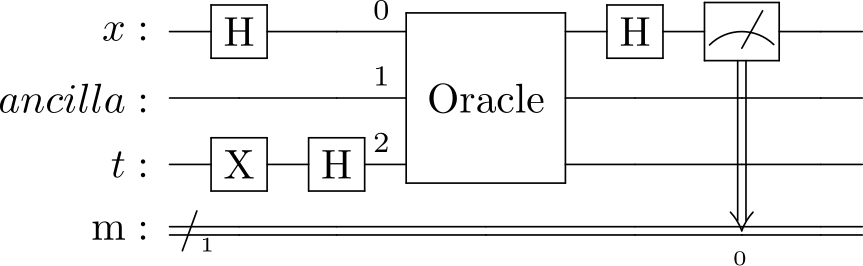

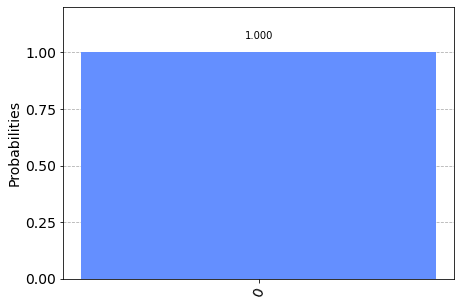

In [39]:
class DJ(QuantumCircuit):
    def __init__(self):
        x = QuantumRegister(1, name="x")
        ancilla = QuantumRegister(1, name="ancilla")
        target = QuantumRegister(1, name="t")
        m = ClassicalRegister(1, name="m")

        super().__init__(x, ancilla, target, m)

        self.x(target)

        for qubit in range(1):
            self.h(qubit)
        self.h(target)

        oracle = Oracle().to_gate()
        self.append(oracle, [0, 1, 2])

        for qubit in range(1):
            self.h(qubit)

        for i in range(1):
            self.measure(x[i], m[i])

        
dj = DJ()
results = dj.simulate()
display(dj.visualize())
plot_histogram(results.get_counts())

ibmqfactory.load_account:WARNING:2022-11-29 09:36:42,552: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibmq_lima
Job Status: job has successfully run
2022-11-29 09:37:35+02:00


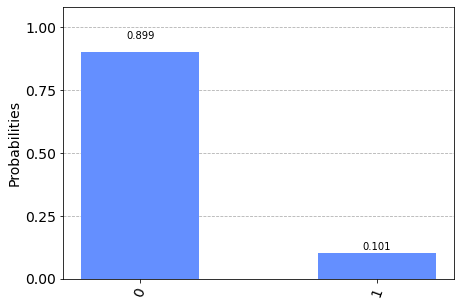

In [40]:
backend = get_ibm_backend(3)
results = dj.run(backend)
print(results.date)
plot_histogram(results.get_counts())